In [101]:
import pandas as pd
import numpy as np
import os
from tqdm import tqdm, tqdm_pandas
import matplotlib as mpl
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
import datetime as datetime

In [30]:
# Load in data
column_names = ['ID', 'Title', 'From', 'To', 'House', 'Term', 'Session', 'Meeting',
       'Sitting', 'Agenda', 'Subcorpus', 'Speaker_role', 'Speaker_type',
       'Speaker_party', 'Speaker_party_name', 'Party_status', 'Speaker_name',
       'Speaker_gender', 'Speaker_birth', "Text"]
ParlaMint = pd.read_csv("data/parlamint.csv", index_col=False, usecols = column_names)

### Size of dataset

In [31]:
MB_size = os.path.getsize("data/parlamint.csv") / 1024 / 1024 # Convert from byte to MB
print(f"The dataset is {MB_size:0.2f} MB.")
print(f"The dataset consists of {ParlaMint.shape[0]} datapoints each with a feature length of {ParlaMint.shape[1]}.")


The dataset is 676.02 MB.
The dataset consists of 552103 datapoints each with a feature length of 20.


In [19]:
ParlaMint.count()

ID                    552103
Title                 552103
From                  552103
To                    552103
House                 552103
Term                  552103
Session                    0
Meeting                    0
Sitting                    0
Agenda                     0
Subcorpus             552103
Speaker_role          552103
Speaker_type          552103
Speaker_party         550489
Speaker_party_name    551961
Party_status          548885
Speaker_name          552103
Speaker_gender        552103
Speaker_birth         552103
Text                  552103
dtype: int64

As seen above they are a few nan values (could remove those?)
Should also remove "Session", "Meeting", "Sitting", "Agenda" since all values are nans.

In [32]:
ParlaMint = ParlaMint.drop(["Session", "Meeting", "Sitting", "Agenda"], axis = 1)
ParlaMint.shape[1]

16

### Some visualisation

In [36]:
# Lets customize some of the parameters of the matplotlib library.
def setup_mpl():
    mpl.rcParams["font.family"] = "Helvetica Neue"
    mpl.rcParams["lines.linewidth"] = 1
setup_mpl()

In [160]:
len(ParlaMint["Speaker_name"].unique())

1895

In [38]:
ParlaMint.set_index("From")

,ID,Title,To,House,Term,Subcorpus,Speaker_role,Speaker_type,Speaker_party,Speaker_party_name,Party_status,Speaker_name,Speaker_gender,Speaker_birth,Text
From,,,,,,,,,,,,,,,
2015-01-05,ParlaMint-GB_2015-01-05-commons.u1,"Minutes of the House of Commons, Daily Session...",2015-01-05,Lower house,55,Reference,Regular,MP,LD,Liberal Democrat,Coalition,"Willott, Jennifer Nancy",F,-,1. What progress her Department has made on im...
2015-01-05,ParlaMint-GB_2015-01-05-commons.u2,"Minutes of the House of Commons, Daily Session...",2015-01-05,Lower house,55,Reference,Regular,MP,CON,Conservative,Coalition,"May, Theresa Mary",F,-,The Government are on track to deliver their c...
2015-01-05,ParlaMint-GB_2015-01-05-commons.u3,"Minutes of the House of Commons, Daily Session...",2015-01-05,Lower house,55,Reference,Regular,MP,LD,Liberal Democrat,Coalition,"Willott, Jennifer Nancy",F,-,"It is clear that exit checks, which were scrap..."
2015-01-05,ParlaMint-GB_2015-01-05-commons.u4,"Minutes of the House of Commons, Daily Session...",2015-01-05,Lower house,55,Reference,Regular,MP,CON,Conservative,Coalition,"May, Theresa Mary",F,-,"As I indicated in my original answer, we are o..."
2015-01-05,ParlaMint-GB_2015-01-05-commons.u5,"Minutes of the House of Commons, Daily Session...",2015-01-05,Lower house,55,Reference,Regular,MP,LAB,Labour,Opposition,"Cunningham, Alexander",M,-,19. Given the situation at our border in Calai...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-03-01,ParlaMint-GB_2021-03-01-lords.u223,"Minutes of the House of Lords, Daily Session 2...",2021-03-01,Upper house,58,COVID,Regular,notMP,LAB,Labour,Opposition,"Hendy, John",M,-,"My Lords, an increase in the national minimum ..."
2021-03-01,ParlaMint-GB_2021-03-01-lords.u224,"Minutes of the House of Lords, Daily Session 2...",2021-03-01,Upper house,58,COVID,Regular,MP,CON,Conservative,Opposition,"Balfe, Richard",M,-,"My Lords, the Opposition are struggling to fin..."
2021-03-01,ParlaMint-GB_2021-03-01-lords.u225,"Minutes of the House of Lords, Daily Session 2...",2021-03-01,Upper house,58,COVID,Regular,MP,LAB,Labour,Opposition,"Liddle, Roger John",M,-,"My Lords, I will associate myself with the com..."


In [157]:
group = ParlaMint.groupby(by = ["From", "House"]).count()
group = group.iloc[:,0]

In [158]:
group = pd.DataFrame(group) # columns = ["From", "House"]
#group.reset_index(level=1, drop=True),
group = group.reset_index()
group = group.rename(columns = {"ID":"Count"})
group


,From,House,Count
0,2015-01-05,Lower house,391
1,2015-01-06,Lower house,323
2,2015-01-06,Upper house,147
3,2015-01-07,Lower house,425
4,2015-01-07,Upper house,197
...,...,...,...
1789,2021-02-24,Upper house,151
1790,2021-02-25,Lower house,401
1791,2021-02-25,Upper house,155
1792,2021-03-01,Lower house,330


In [ ]:
group['From'] = pd.to_datetime(group['From'])
myFmt = mdates.DateFormatter("%b %Y")
fig, ax = plt.subplots(figsize=(10,2.5), dpi = 400)
ax.plot(group.From)

array([<AxesSubplot:xlabel='From,House'>], dtype=object)

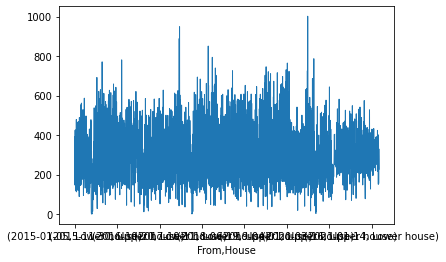

In [118]:
group.plot(y = ["From", "House"], subplots = True)

In [94]:
group.columns.levels

AttributeError: 'Index' object has no attribute 'levels'

In [89]:
ax.set_xticklabels(["%s-%02d" % item for item in g.index.tolist()],
rotation=45, ha='center')

array([391, 323, 147, ..., 155, 330, 227], dtype=int64)

ValueError: The number of FixedLocator locations (10), usually from a call to set_ticks, does not match the number of ticklabels (1794).

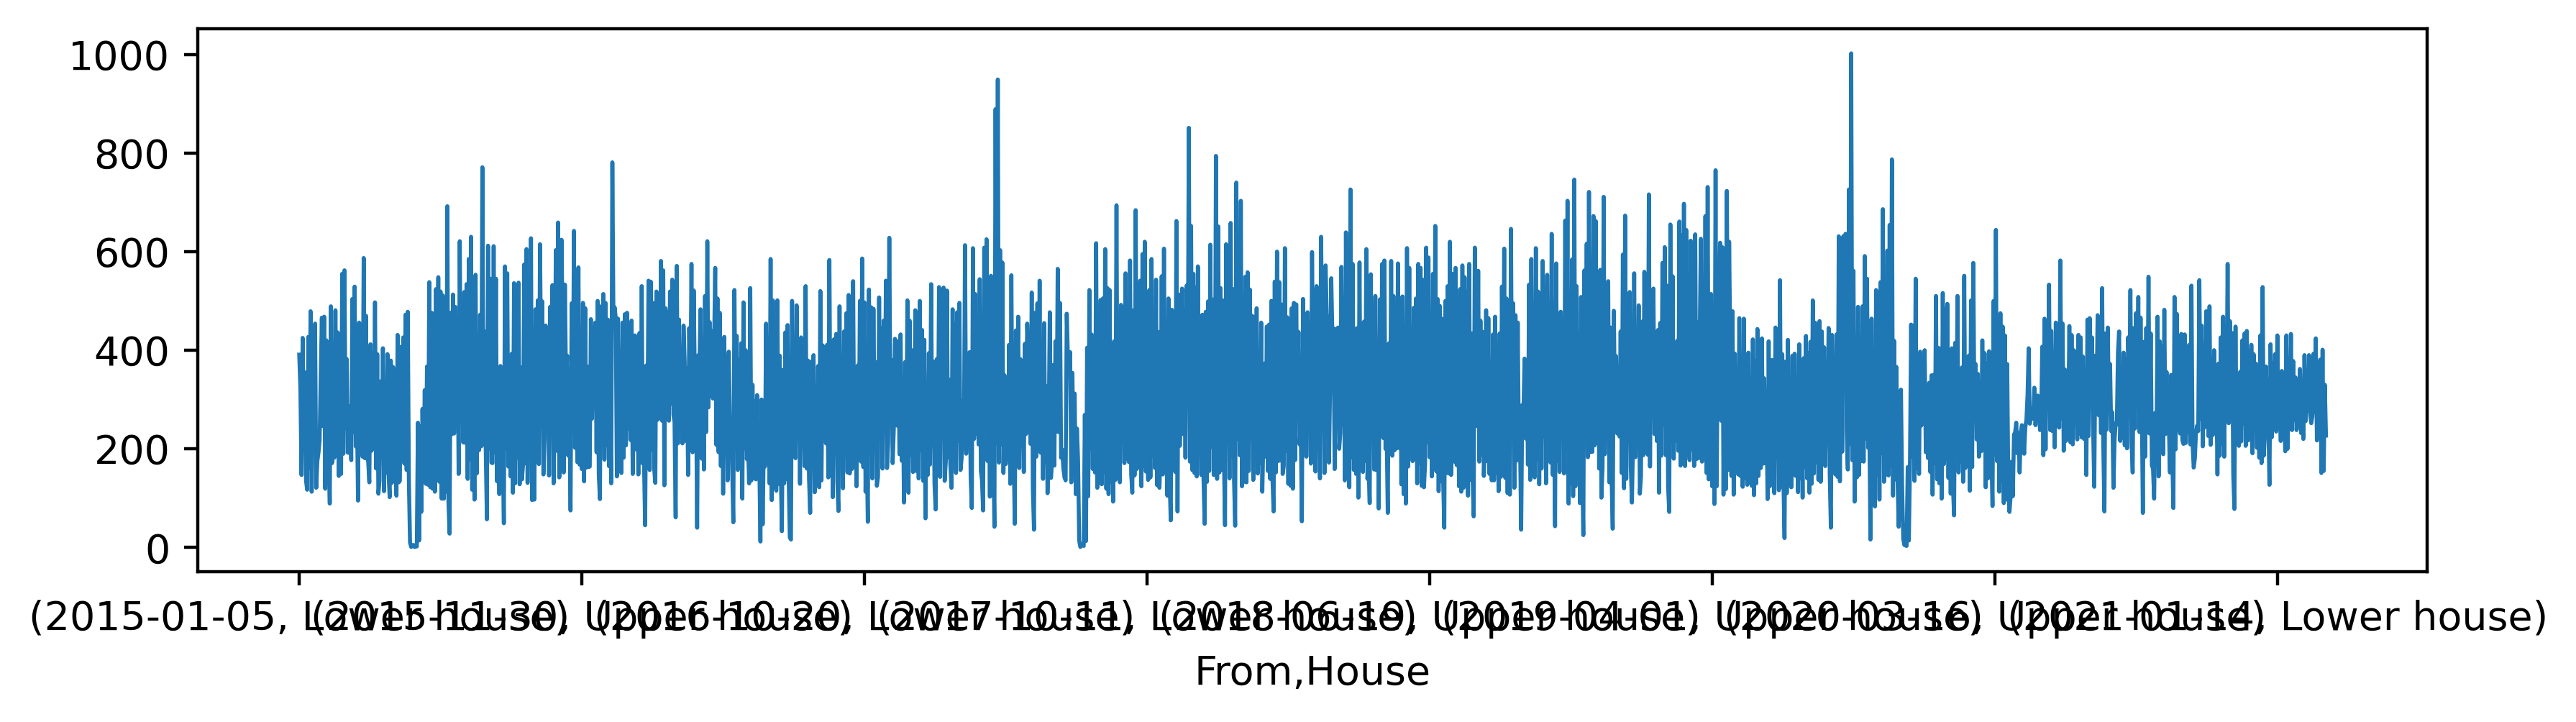

In [104]:
myFmt = mdates.DateFormatter("%b %Y")
fig, ax = plt.subplots(figsize=(10,2.5), dpi = 400)
ax = group.iloc[:, 0].plot()
#group.set_index("From")
ax.set_xticklabels([item for item in group.index.tolist()],
rotation=45, ha='center')
ax.set_xlim([datetime.date(2020, 1, 1), datetime.date(2021, 1, 25)])
ax.xaxis.set_major_formatter(myFmt)

In [82]:
group.iloc[:, 0]

From        House      
2015-01-05  Lower house    391
2015-01-06  Lower house    323
            Upper house    147
2015-01-07  Lower house    425
            Upper house    197
                          ... 
2021-02-24  Upper house    151
2021-02-25  Lower house    401
            Upper house    155
2021-03-01  Lower house    330
            Upper house    227
Name: ID, Length: 1794, dtype: int64

In [ ]:
# Maybe for each term
group

In [71]:
#group.iloc[0:9,:]
#group["Speaker_party_name"] #.isnull().values.any()
group.iloc[10000:10050,:]

ID  Title   To  House  Term  \
From       Speaker_party_name                                               
2020-10-13 Green Party                         5      5    5      5     5   
           Independent                        10     10   10     10    10   
           Labour                            128    128  128    128   128   
           Labour;Non-affiliated               1      1    1      1     1   
           Liberal Democrat                   64     64   64     64    64   
           Liberal Democrat;Crossbench         1      1    1      1     1   
           Non-affiliated                      5      5    5      5     5   
           Plaid Cymru                         1      1    1      1     1   
           Plaid Cymru;Independent             4      4    4      4     4   
           Scottish National Party            24     24   24     24    24   
2020-10-14 Bishops                             1      1    1      1     1   
           Conservative                      303    303  303    303   303   
           Conservative;Independent            2      2    2      2     2   
           Crossbench                         23     23   23     23    23   
           Democratic Unionist Party           2      2    2      2     2   
           Green Party                         3      3    3      3     3   
           Independent                         7      7    7      7     7   
           Labour                            185    185  185    185   185   
           Labour Independent                  1      1    1      1     1   
           Labour;Non-affiliated               1      1    1      1     1   
           Liberal Democrat                   37     37   37     37    37   
           Non-affiliated                      3      3    3      3     3   
           Plaid Cymru                        20     20   20     20    20   
           Scottish National Party            22     22   22     22    22   
           Social Democratic & Labour Party    1      1    1      1     1   
2020-10-15 -                                   2      2    2      2     2   
           Bishops                             2      2    2      2     2   
           Conservative                      377    377  377    377   377   
           Conservative;Independent            1      1    1      1     1   
           Crossbench                         17     17   17     17    17   
           Democratic Unionist Party           5      5    5      5     5   
           Green Party                         1      1    1      1     1   
           Independent                         6      6    6      6     6   
           Labour                            152    152  152    152   152   
           Labour Independent                  1      1    1      1     1   
           Liberal Democrat                   45     45   45     45    45   
           Non-affiliated                      4      4    4      4     4   
           Plaid Cymru                         2      2    2      2     2   
           Scottish National Party            34     34   34     34    34   
           Social Democratic & Labour Party    1      1    1      1     1   
2020-10-16 -                                   4      4    4      4     4   
           Conservative                      196    196  196    196   196   
           Labour                             10     10   10     10    10   
2020-10-19 Alliance                            1      1    1      1     1   
           Bishops                             3      3    3      3     3   
           Conservative                      382    382  382    382   382   
           Conservative;Crossbench             1      1    1      1     1   
           Conservative;Independent            5      5    5      5     5   
           Crossbench                         32     32   32     32    32   
           Crossbench;Non-affiliated           1      1    1      1     1   

                                         

### Network analysis

In [28]:
ParlaMint

,ID,Title,From,To,House,Term,Subcorpus,Speaker_role,Speaker_type,Speaker_party,Speaker_party_name,Party_status,Speaker_name,Speaker_gender,Speaker_birth,Text
0,ParlaMint-GB_2015-01-05-commons.u1,"Minutes of the House of Commons, Daily Session...",2015-01-05,2015-01-05,Lower house,55,Reference,Regular,MP,LD,Liberal Democrat,Coalition,"Willott, Jennifer Nancy",F,-,1. What progress her Department has made on im...
1,ParlaMint-GB_2015-01-05-commons.u2,"Minutes of the House of Commons, Daily Session...",2015-01-05,2015-01-05,Lower house,55,Reference,Regular,MP,CON,Conservative,Coalition,"May, Theresa Mary",F,-,The Government are on track to deliver their c...
2,ParlaMint-GB_2015-01-05-commons.u3,"Minutes of the House of Commons, Daily Session...",2015-01-05,2015-01-05,Lower house,55,Reference,Regular,MP,LD,Liberal Democrat,Coalition,"Willott, Jennifer Nancy",F,-,"It is clear that exit checks, which were scrap..."
3,ParlaMint-GB_2015-01-05-commons.u4,"Minutes of the House of Commons, Daily Session...",2015-01-05,2015-01-05,Lower house,55,Reference,Regular,MP,CON,Conservative,Coalition,"May, Theresa Mary",F,-,"As I indicated in my original answer, we are o..."
4,ParlaMint-GB_2015-01-05-commons.u5,"Minutes of the House of Commons, Daily Session...",2015-01-05,2015-01-05,Lower house,55,Reference,Regular,MP,LAB,Labour,Opposition,"Cunningham, Alexander",M,-,19. Given the situation at our border in Calai...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
552098,ParlaMint-GB_2021-03-01-lords.u223,"Minutes of the House of Lords, Daily Session 2...",2021-03-01,2021-03-01,Upper house,58,COVID,Regular,notMP,LAB,Labour,Opposition,"Hendy, John",M,-,"My Lords, an increase in the national minimum ..."
552099,ParlaMint-GB_2021-03-01-lords.u224,"Minutes of the House of Lords, Daily Session 2...",2021-03-01,2021-03-01,Upper house,58,COVID,Regular,MP,CON,Conservative,Opposition,"Balfe, Richard",M,-,"My Lords, the Opposition are struggling to fin..."
552100,ParlaMint-GB_2021-03-01-lords.u225,"Minutes of the House of Lords, Daily Session 2...",2021-03-01,2021-03-01,Upper house,58,COVID,Regular,MP,LAB,Labour,Opposition,"Liddle, Roger John",M,-,"My Lords, I will associate myself with the com..."
552101,ParlaMint-GB_2021-03-01-lords.u226,"Minutes of the House of Lords, Daily Session 2...",2021-03-01,2021-03-01,Upper house,58,COVID,Regular,MP,LAB,Labour,Opposition,"Lennie, Christopher",M,-,"My Lords, I will make some brief comments and ..."
